# K-Mean Clustering in Python

The total credits in this document are for: [K-Mean Clustering in Python | Machine Learning | KGP Talkie](https://kgptalkie.com/k-mean-clustering-in-python-machine-learning-kgp-talkie/)

## Concept

### What is K-Mean Clustering?

Machine Learning can broadly be classified into three types:

1. Supervised Learning
2. Unsupervised Learning
3. Semi-supervised Learning

*K-means* algorithm identifies *k* number of centroids, and the allocates every data point to the nearest cluster, while keeping the centroids as small as possible. The *'means'* in the k-means refers to averaging of the data; this is, finding the centroid.

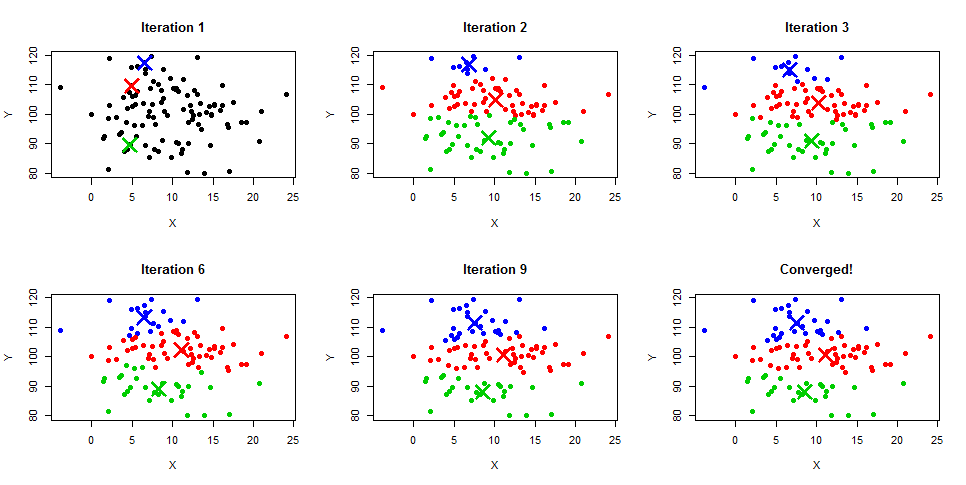

### Types of Clustering

- Hard Clustering
- Soft Clustering

### Connectivity-based clustering

The main idea behind this *clustering* is that data points that are *closer* in the data space are more *related (similar)* than to data points farther away. They are also not very roboust towards outliers, which might show up as additional clusters or even cause other clusters to merge. 

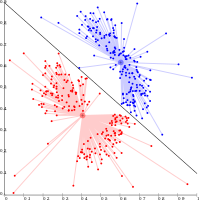

### Centroid-based clustering

In this type of clustering, clusters are represented by a central *vector* or a *centroid* might not necessarily be a member of the dataset

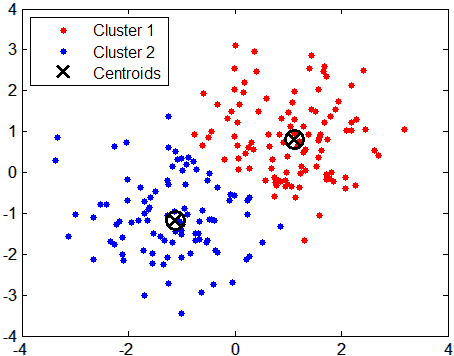

### Distribution-based clustering

These models have a strong theoritical foundation, however they often suffer from overfitting. Gaussian mixture models, using the expectation-maximization algorithm is a famous distribution based clustering method.

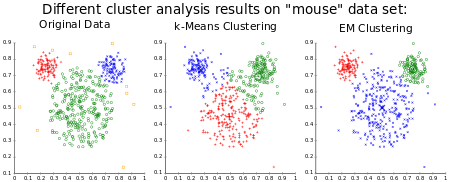

*Density-based methods* search the data space for areas of varied density of data points

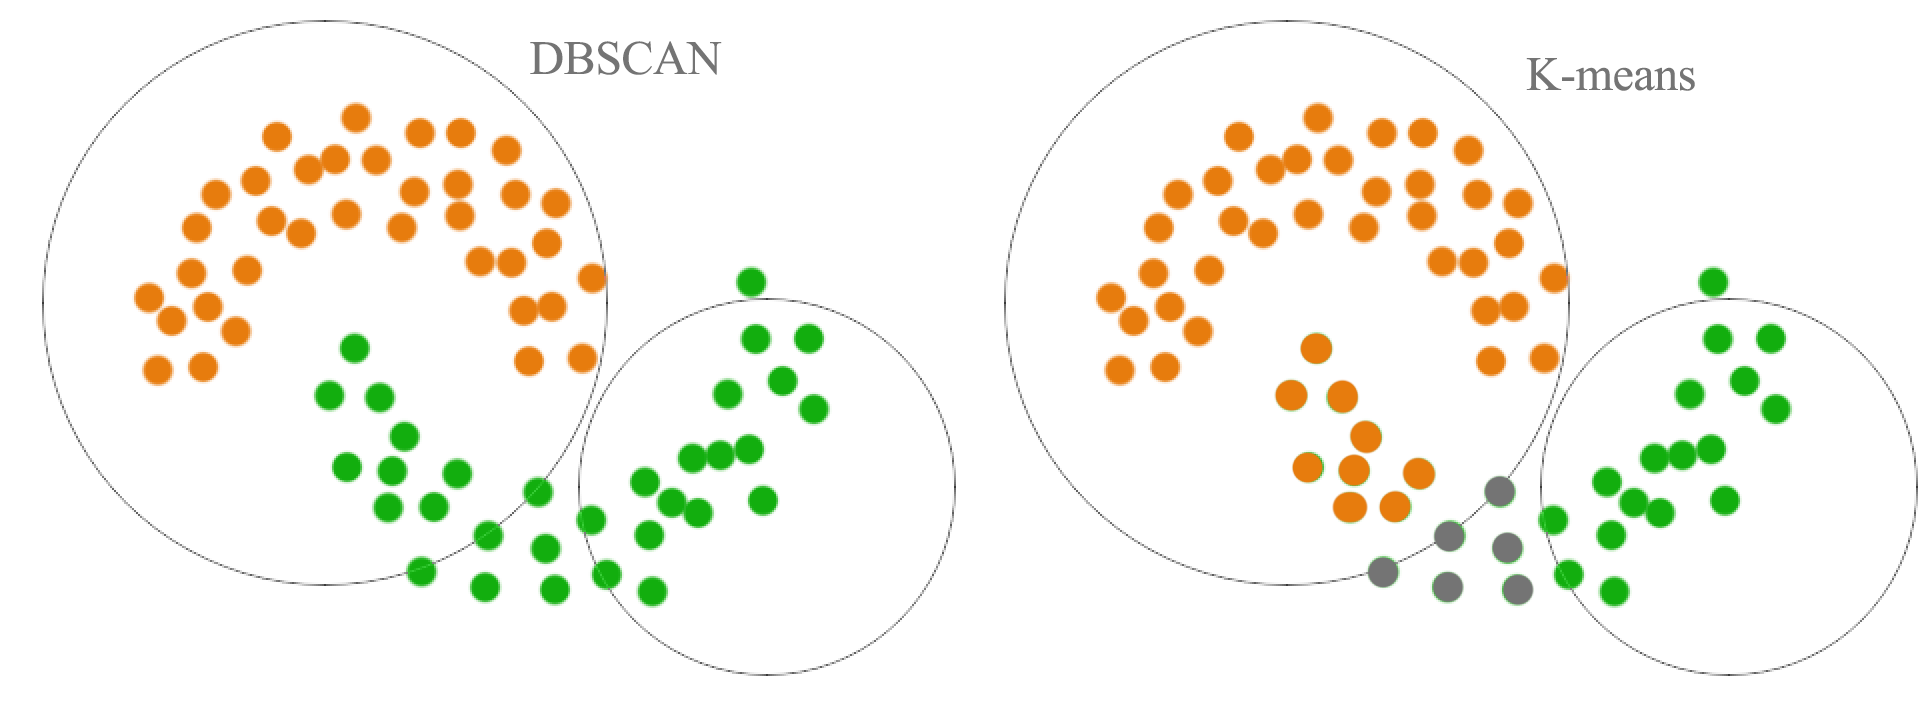

## Dataset and Problem Understanding

At first we will be importing certain libraries which we will need to work on the given dataset.   
*Pandas* which offers data structures and operation for manipulating numerical tables.  
*Seaborn* and *matplotlib* for data visualizations.   
Also *numpy* for working on array.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Fetching the data usign *pandas*.

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/laxmimerit/K-Mean-Clustering-in-Python-KGP-Talkie-Crash-Course/master/data.csv', index_col=0, encoding='utf-8')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   x        200 non-null    float64
 1   y        200 non-null    float64
 2   cluster  200 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 6.2 KB


Let's look at the top five rows using the Dataframe's *head() method*. You can find out what all categories exist and how many instances (row) belong to each category by using *value_counts() method*.

In [7]:
data.head()

,x,y,cluster
0,-8.482852,-5.603349,2
1,-7.751632,-8.405334,2
2,-10.967098,-9.032782,2
3,-11.999447,-7.606734,2
4,-1.736810,10.478015,1


In [6]:
data['cluster'].value_counts()

1    67
0    67
2    66
Name: cluster, dtype: int64

So, we have 67 dataset each which belong to cluster 1 and cluster 0 and 66 dataset belong to cluster 2.  
Now we can a scatter plot of the dataset and visualize the cluster formed. We have matplotlib library which we have already impoted above to plot the dataset. So before you can plot anything, you need to specify which backend *Matplotlib* should use. The simplest option is to use Jupyter's command *%matplotlib inline*. This tells Jupyter to set up Matplotlib so it uses Jupyter's own backend.

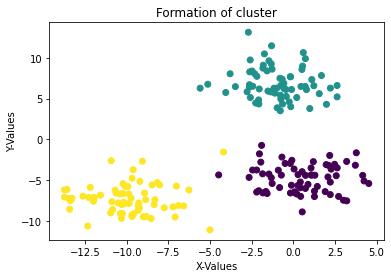

In [8]:
plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='viridis')

plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.title('Formation of cluster')
plt.show()

## K-Means for clustering

The K-Means algorithm is a simple algortihm capable of clustering the same kind of dataset very quickly and efficiently, often in just a few iterations. Its an *unsupervised machine learning technique*.   
Let´s train a K-Means cluster on this dataset. It will try to find each *blob's center* and assign each instance to the closed blob. Importing K-Means from *sklearn cluster* at first.

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [12]:
X = data[['x', 'y']]
y = data['cluster']

We *standardize* the dataset before training the algorithm because the variable can of incomparable units (eg one in cm other in kg) so we should standardize variables, ofcourse. Also when the data show quite a different variances it is a good practice to standardize the data. 

In [13]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X[: 5]

array([[-1.01200363, -0.60606415],
       [-0.86550679, -1.04265203],
       [-1.5097118 , -1.14041707],
       [-1.71653856, -0.91821912],
       [ 0.33953731,  1.89963378]])

Now we impute back the standerdized data in our dataset and train the algorithm

In [15]:
data[['x', 'y']] = X

We are taking the number of clusters k as two for time being.  
Note that you have to specify the number of clusters k that the algorithm must find. In this dataset, it is pretty obvious from looking at the data that k should be set to 3, but we choose it 2 as of now. Also in general it is not that easy to find the number of clusters.    
Later we will see the method to find the optimal number of cluster for a dataset.

In [16]:
k = 2
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [17]:
KMeans(n_clusters=2, random_state=42)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

We will take a look at the two centroid that the algorithm found:

In [18]:
center = kmeans.cluster_centers_
center

array([[-1.30618271, -0.87560626],
       [ 0.64334372,  0.43126875]])

Now plotting the dataset and each centroid.

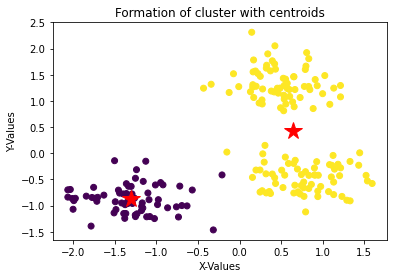

In [19]:
plt.scatter(data['x'], data['y'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.title('Formation of cluster with centroids')

for i, point in enumerate(center):
  plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)

With number of cluster as 2 the centroid (marked as red star above) are pretty obivious.

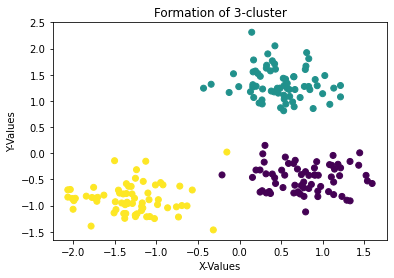

In [20]:
plt.scatter(data['x'], data['y'], c=data['cluster'], cmap='viridis')
plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.title('Formation of 3-cluster')
plt.show()

Here we can easily visualize 3 clusters. So, now we will see how we can find out the right value for K (number of cluster)

## How do I choose right value of k?

You need to understand how it works?  
Assuming we have inputs x_1, x_2, x_3, ... , x_nx

- **Step 1:** Pick K random points as cluster centers called centroids.
- **Step 2:** Assign each x_i to nearest cluster by calculating its distance to each centroid.
- **Step 3:** Find new cluster center by taking the average of the assigned points.
- **Step 4:** Repeat Step 2 and 3 until none of the cluster assignments change.

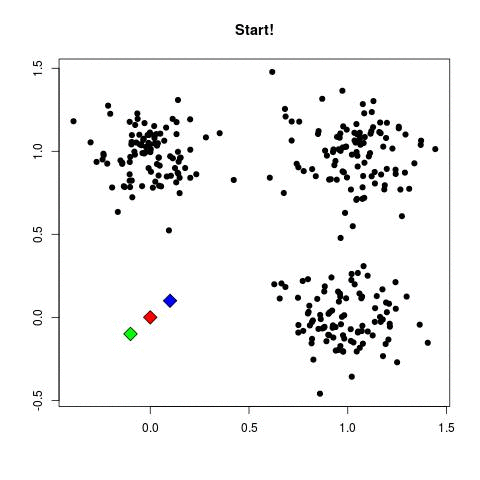

***Most important, when to stop increasing K?***   
We often know the value of K. In that case we use the value of K. Else we use the *Elbow Method*

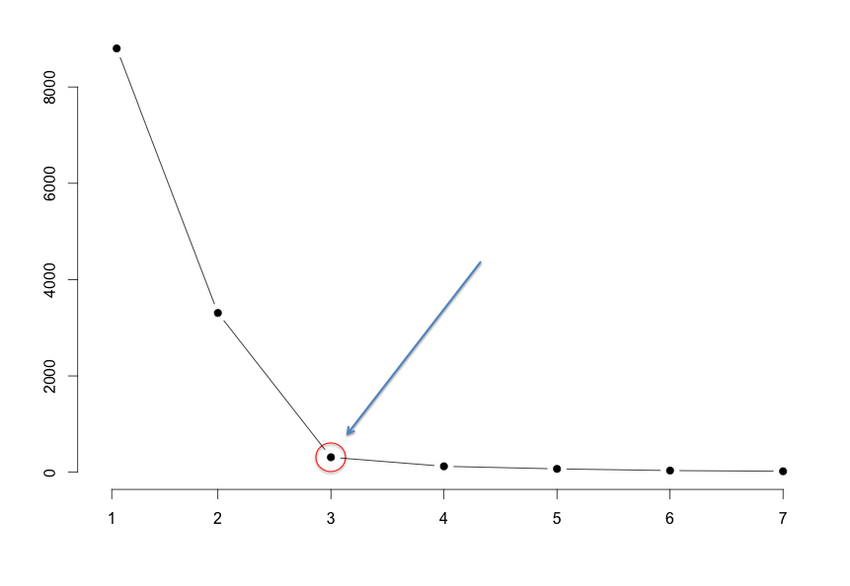

## Error Sum of Squres (SSE)

It is the sum of the squared differences between each observation and its group's mean. We can use it as a measure of variation within a cluster. All cases within a cluster are identical then **SSE** would be equal to 0. We run the algorithm foor different values of K(say k=10 to 1) and plot the K values against SSE(Sum of Squared Errors). And select the value of K for the elbow point as shown in the figure.  
So we try value for K between 1 to 10 and use elbow method as explaind above.

$$ arg_{s} min \sum_{i=1}^{k} (\sum_{x_{j}\in S_{i}} ||x_{j} - \mu_{i} ||^{2}) $$

In [21]:
SSE = []
index = range(1, 10)
for i in index:
  kmeans = KMeans(n_clusters=i, random_state=42)
  kmeans.fit(X)
  SSE.append(kmeans.inertia_)
  print(kmeans.inertia_)

400.0000000000001
156.41078579574986
44.05704845329278
36.72638711866608
31.016427615314644
25.39959047192452
22.547184727743293
19.923438178477447
17.295836404824975


Here the *metric inertia* is nothing but the mean squared distance between each instance and its closest centroid.

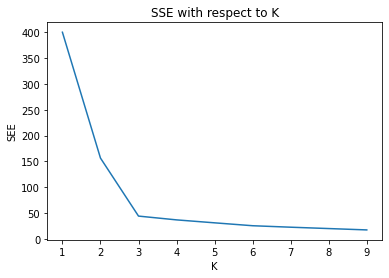

In [22]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SEE')
plt.title('SSE with respect to K')
plt.show()

From the graph, we can observe with increasing the k value SSE will decrease. So, like mentioned before the value of k should be 3. Now lest do it again with k=3

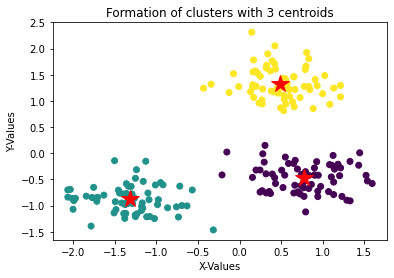

In [24]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X)
KMeans(n_clusters=3, random_state=42)
center = kmeans.cluster_centers_

plt.xlabel('X-Values')
plt.ylabel('Y-Values')
plt.title('Formation of clusters with 3 centroids')

plt.scatter(data['x'], data['y'], c=kmeans.labels_, cmap='viridis')

for i, point in enumerate(center):
  plt.plot(center[i][0], center[i][1], '*r--', linewidth=2, markersize=18)

# Let's go ahead and explore it in a little bit more detail

### Test it with Iris Dataset

In [25]:
from sklearn import datasets

In [26]:
iris = datasets.load_iris()
X = iris.data

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [29]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [46]:
SSE = []
index = range(1, 10)

for i in index:
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(X)
  SSE.append(kmeans.inertia_)
  print(kmeans.inertia_)

600.0
222.36170496502308
139.82049635974982
114.41256181896094
90.92751382392052
80.02249599557439
71.8162459810614
62.28749580350201
54.81105203150129


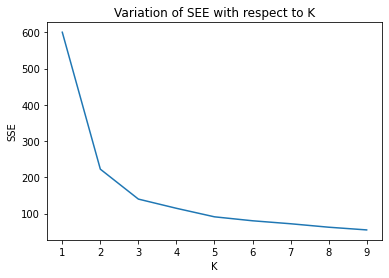

In [47]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Variation of SEE with respect to K')
plt.show()

In [52]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

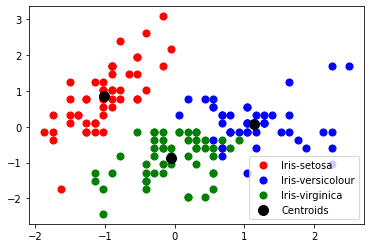

In [64]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=50, c='red', label='Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=50, c='blue', label='Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=50, c='green', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

The graph that generates in the background is the comparative graph between the width and length of the petals